In [18]:
import pandas as pd

In [19]:
taxi_df = pd.read_parquet("data/yellow_taxi_tripdata_2022-01.parquet")
taxi_data = pd.concat([taxi_df])
taxi_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.0,0.5,2.39,0.0,0.3,13.69,NaN,NaN
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.0,0.5,4.35,0.0,0.3,24.45,NaN,NaN
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.0,0.5,2.00,0.0,0.3,16.52,NaN,NaN
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.0,0.5,0.00,0.0,0.3,15.70,NaN,NaN


In [20]:
taxi_data.shape

(2463931, 19)

In [21]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [46]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
                       'trip_distance', 'RatecodeID', 'payment_type', 'PULocationID',
                       'DOLocationID', 'total_amount']]
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,PULocationID,DOLocationID,total_amount
0,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,1,142,236,21.95
1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,1,236,42,13.30
2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,1,166,166,10.56
3,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,2,114,68,11.80
4,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,1,68,163,30.30


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'payment_type'}>],
       [<Axes: title={'center': 'PULocationID'}>,
        <Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

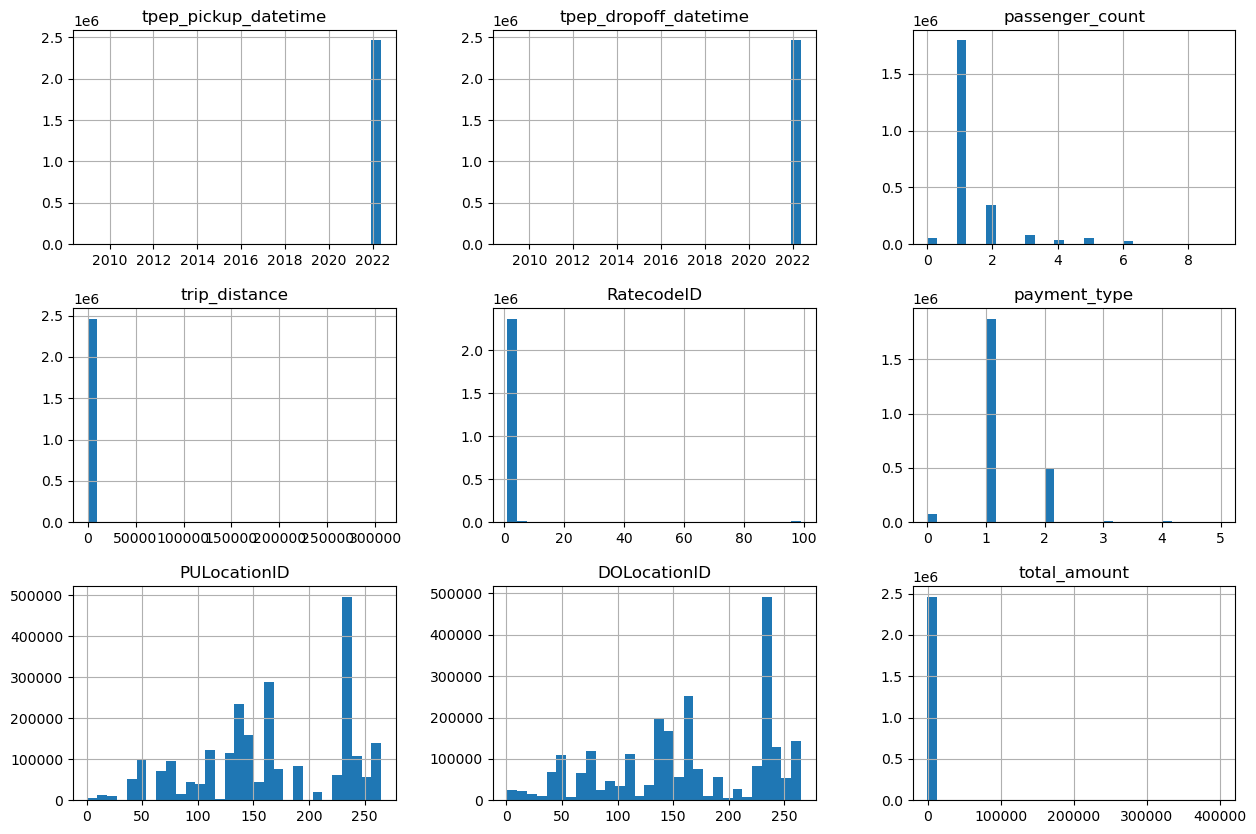

In [47]:
taxi_data.hist(figsize=(15,10), bins=30)

In [48]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     2296363
2.0       66623
5.0       13561
99.0       8732
3.0        4014
4.0        3118
6.0          17
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

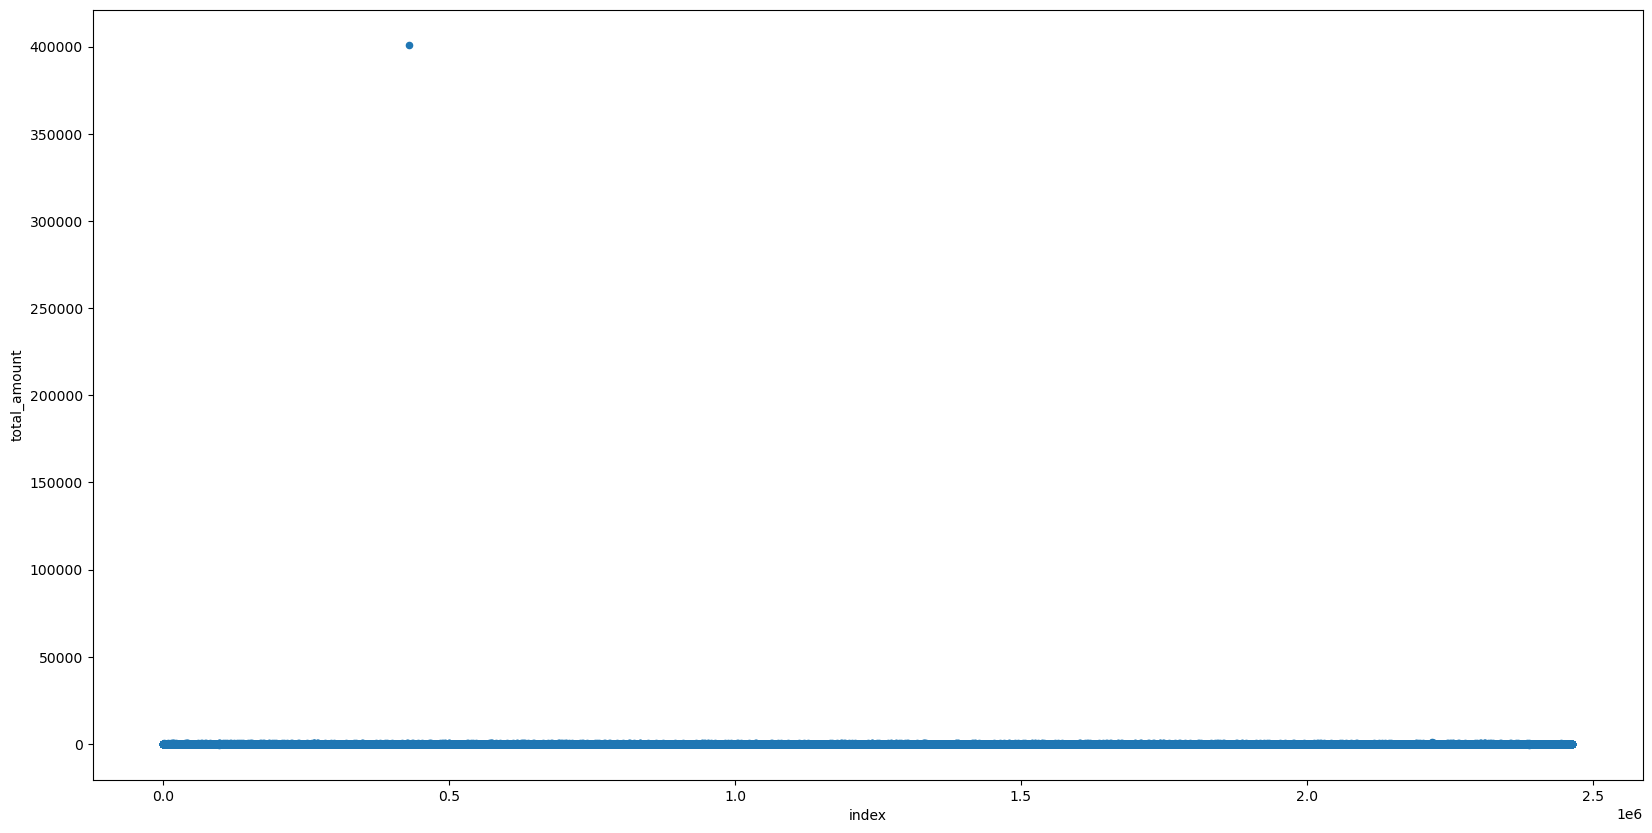

In [49]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(20,10))

<Axes: xlabel='index', ylabel='total_amount'>

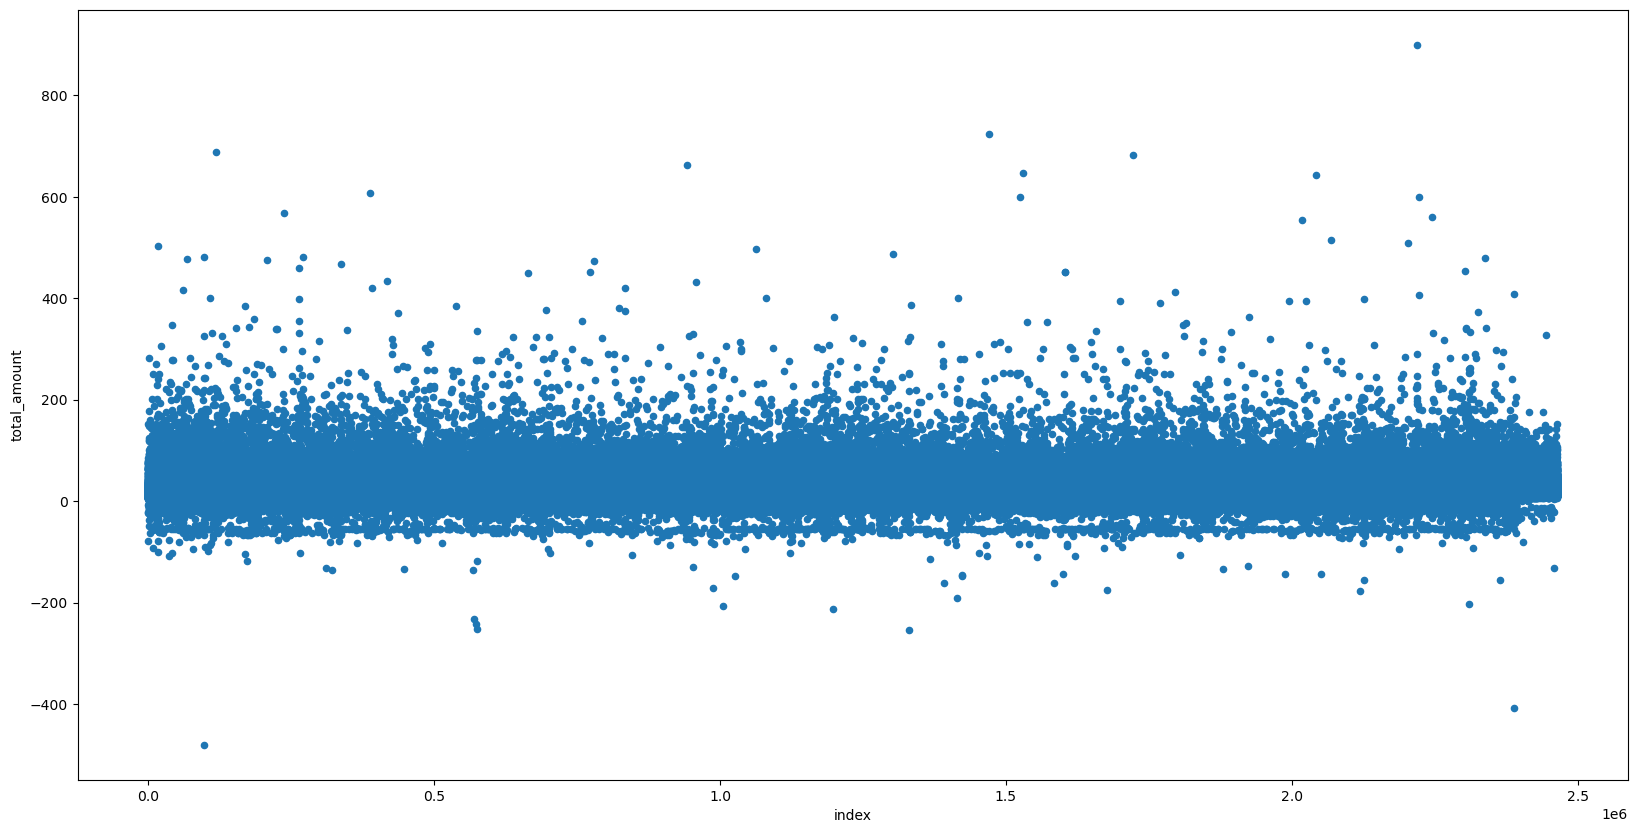

In [50]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(20,10))

(12934, 9)


<Axes: xlabel='index', ylabel='total_amount'>

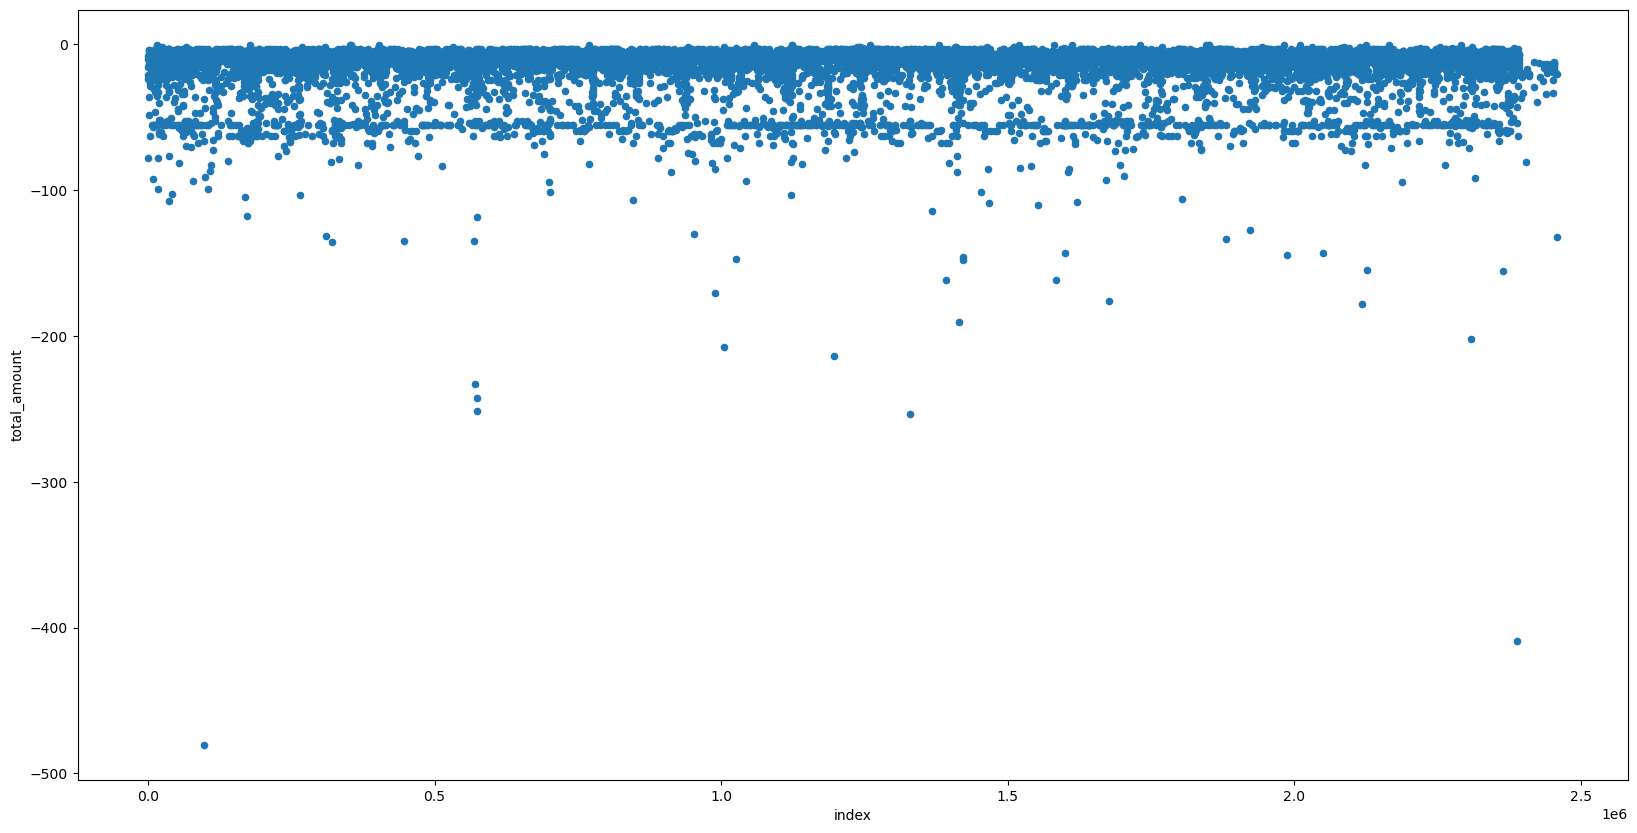

In [51]:
print(taxi_data[taxi_data['total_amount']<0].shape)
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(20,10))

In [57]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,PULocationID,DOLocationID,total_amount
154,2022-01-01 00:26:37,2022-01-01 00:39:35,1.0,7.38,1.0,4,132,265,-23.55
521,2022-01-01 00:27:18,2022-01-01 00:40:50,1.0,5.14,1.0,4,152,48,-20.80
523,2022-01-01 00:59:33,2022-01-01 01:14:09,4.0,5.37,5.0,2,50,265,-77.80
580,2022-01-01 00:16:58,2022-01-01 00:19:41,1.0,0.46,1.0,2,90,234,-7.80
714,2022-01-01 00:29:12,2022-01-01 00:40:29,1.0,3.13,1.0,4,13,246,-15.80


In [58]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
4    7384
3    3221
2    2287
0      37
1       5
Name: count, dtype: int64

<Axes: >

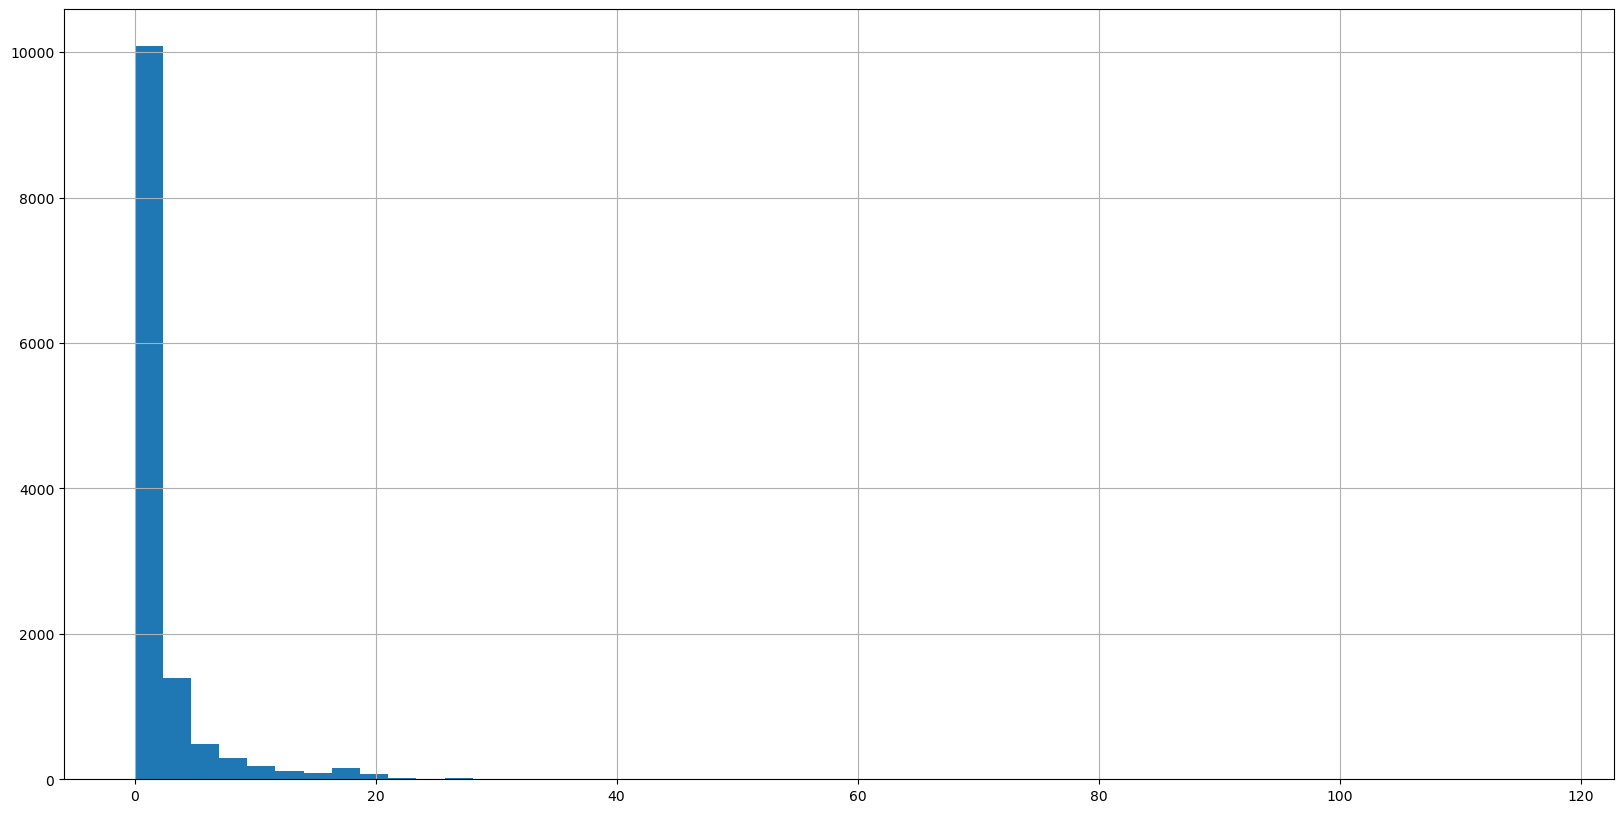

In [60]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins = 50, figsize = (20,10))

In [75]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()

(474, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,PULocationID,DOLocationID,total_amount
10065,2022-01-01 02:46:39,2022-01-01 03:31:48,1.0,0.0,1.0,1,61,61,0.0
10171,2022-01-01 02:34:04,2022-01-01 02:34:16,2.0,0.0,2.0,3,132,132,0.0
30840,2022-01-01 13:29:52,2022-01-01 13:30:08,1.0,0.0,1.0,2,193,193,0.0
34114,2022-01-01 13:43:34,2022-01-01 13:43:47,1.0,0.0,1.0,1,193,193,0.0
53758,2022-01-01 20:13:17,2022-01-01 20:13:17,1.0,0.0,5.0,2,263,264,0.0


In [77]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

payment_type
1    293
2     71
4     61
3     46
0      3
Name: count, dtype: int64

<Axes: >

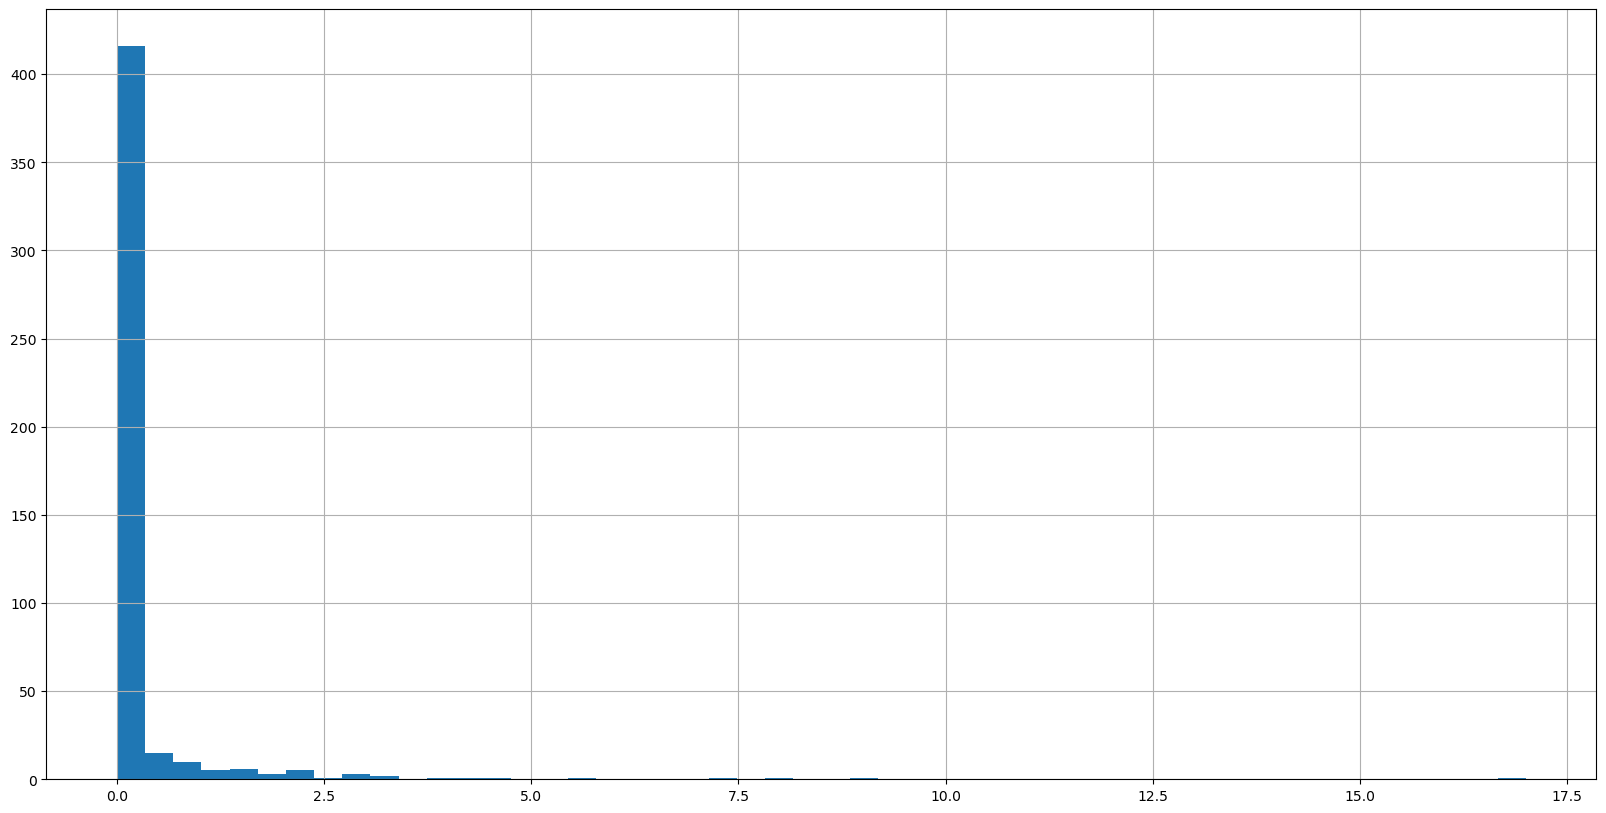

In [81]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins = 50, figsize = (20,10))

In [82]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     391
0.10      16
0.60       7
0.30       6
0.40       4
0.20       3
1.10       3
2.30       3
0.70       3
1.00       3
1.70       2
1.30       2
0.50       2
0.80       2
1.50       2
1.40       2
3.30       2
0.90       2
3.80       1
1.80       1
3.02       1
2.00       1
9.00       1
2.20       1
2.40       1
2.10       1
0.35       1
4.30       1
17.00      1
4.60       1
8.10       1
5.60       1
1.90       1
0.67       1
7.40       1
2.80       1
3.00       1
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

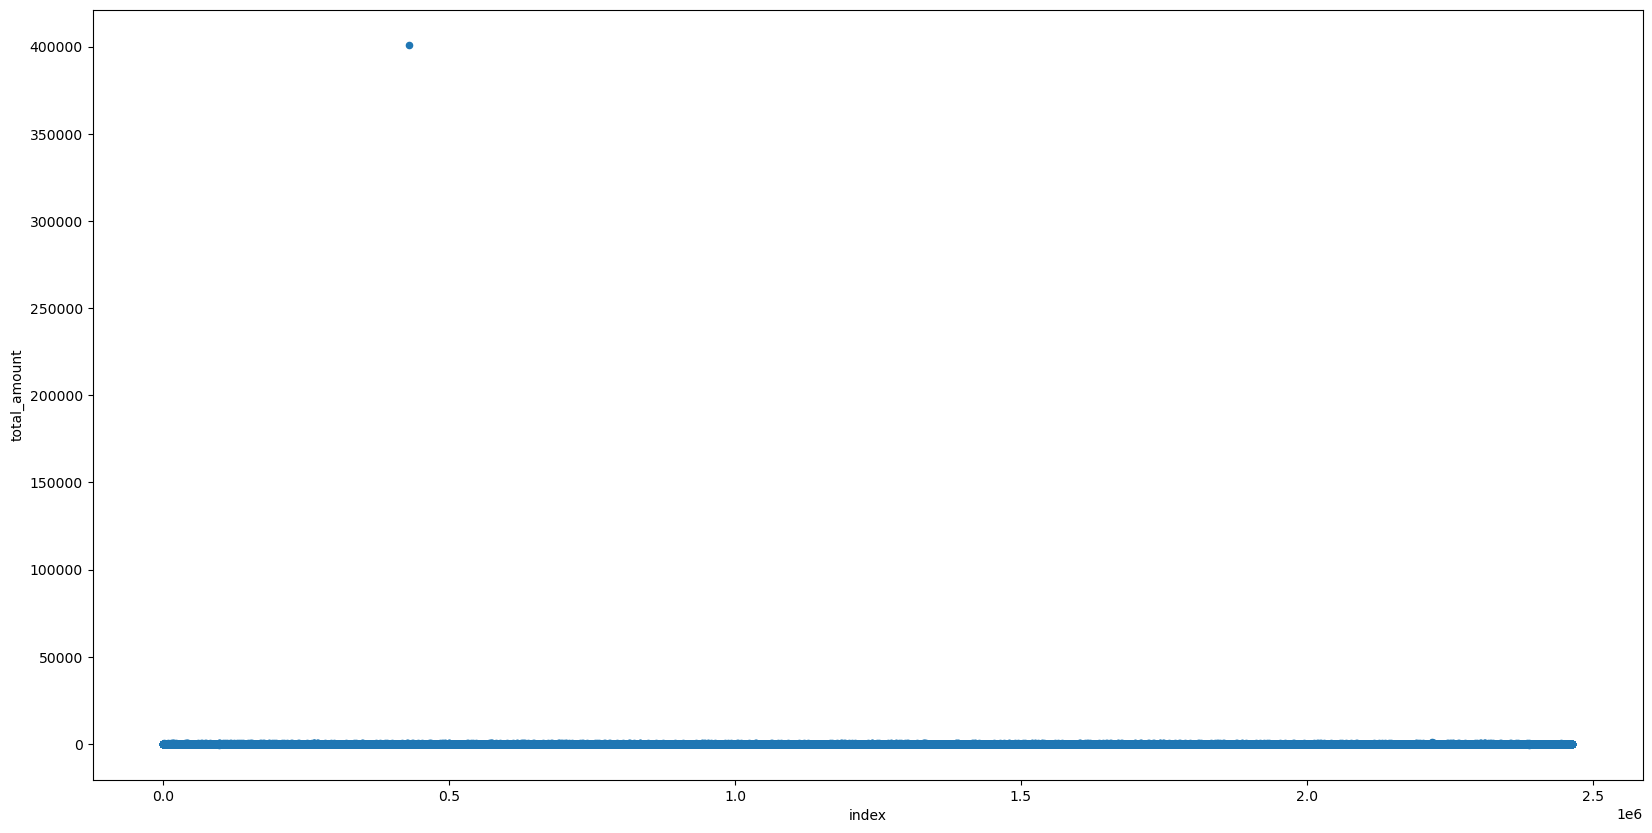

In [85]:
taxi_data.reset_index().plot(kind = 'scatter', figsize = (20,10), y = 'total_amount', x = 'index')

In [99]:
taxi_data[taxi_data['total_amount']>150].shape

(1378, 9)

In [100]:
taxi_data['total_amount'].mean

<bound method Series.mean of 0          21.95
1          13.30
2          10.56
3          11.80
4          30.30
           ...  
2463926    13.69
2463927    24.45
2463928    16.52
2463929    15.70
2463930    35.06
Name: total_amount, Length: 2463931, dtype: float64>